# Entrenamiento de EDO
Resolver:

$\dot \rho_i + 3(1+\gamma)H\rho_i = 0$

$H^2 = \frac{\kappa_0}{3}\sum \rho_i$

Cambiando variables, a:

$\Omega_i = \frac{\kappa_0 }{3H^2} \rho_i$ 

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from keras import models
from keras import layers
from keras import optimizers

# 1. Transformamos la EDO en una función

In [2]:
def RHS(Omega_i, lna, gamma=0):
    #x, y, z, H = Omega_i
    x, y, z = Omega_i
    pi = 3*x + 4*y
    #return [x*(-3 + pi), y*(-4 + pi), z*pi, -0.5*H*pi]
    return [x*(-3 + pi), y*(-4 + pi), z*pi]

def EDO(t,Om):
    #t,Or,Om,Ol=X
    Or=0.0001
    Ol=1-Or-Om
    H0 = 70.
    y0 = [Om, Or, Ol]
    result = odeint(RHS, y0, t)
    return result

def split(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val

# 2. Gneramos el conjunto de datos 
Con las suficientes convinaciones de $\Omega _i$ como para que el algrtimo aprenda
Vamos a variar 



$O_m \in [0.1, 0.5]$


$t \in [0,-12]$

In [20]:
O_m=np.arange(0.1,1.1,0.01)
t=np.linspace(0,-12,100)

In [50]:
Y0=[]
for i in O_m:
    Y0.extend(EDO(t,i))
Y0=np.array(Y0)

X0=[]
for Om in O_m:
    for T in t:
        X0.append([T,Om])
X0=np.array(X0)

# Creamos la Red Neuronal que trabajará estos datos


Epoch 1/100
2000/2000 [==============================] - 2s 692us/step - loss: 0.0439 - val_loss: 0.0062
Epoch 2/100
2000/2000 [==============================] - 1s 636us/step - loss: 0.0094 - val_loss: 0.0070
Epoch 3/100
2000/2000 [==============================] - 1s 672us/step - loss: 0.0070 - val_loss: 0.0045
Epoch 4/100
2000/2000 [==============================] - 1s 657us/step - loss: 0.0043 - val_loss: 0.0027
Epoch 5/100
2000/2000 [==============================] - 1s 696us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 6/100
2000/2000 [==============================] - 1s 677us/step - loss: 0.0017 - val_loss: 0.0010
Epoch 7/100
2000/2000 [==============================] - 1s 672us/step - loss: 0.0013 - val_loss: 8.4886e-04
Epoch 8/100
2000/2000 [==============================] - 1s 614us/step - loss: 0.0011 - val_loss: 5.2898e-04
Epoch 9/100
2000/2000 [==============================] - 1s 637us/step - loss: 8.4662e-04 - val_loss: 8.3651e-04
Epoch 10/100
2000/2000 [===============

2000/2000 [==============================] - 1s 605us/step - loss: 8.7725e-05 - val_loss: 3.1625e-04
Epoch 74/100
2000/2000 [==============================] - 1s 619us/step - loss: 8.8574e-05 - val_loss: 4.4269e-05
Epoch 75/100
2000/2000 [==============================] - 1s 610us/step - loss: 8.0913e-05 - val_loss: 1.3443e-04
Epoch 76/100
2000/2000 [==============================] - 1s 615us/step - loss: 8.5357e-05 - val_loss: 3.1376e-04
Epoch 77/100
2000/2000 [==============================] - 1s 615us/step - loss: 9.0646e-05 - val_loss: 3.1922e-05
Epoch 78/100
2000/2000 [==============================] - 1s 620us/step - loss: 8.3365e-05 - val_loss: 5.9119e-05
Epoch 79/100
2000/2000 [==============================] - 1s 626us/step - loss: 8.8638e-05 - val_loss: 1.1523e-04
Epoch 80/100
2000/2000 [==============================] - 1s 618us/step - loss: 8.4056e-05 - val_loss: 8.9238e-05
Epoch 81/100
2000/2000 [==============================] - 1s 615us/step - loss: 8.4743e-05 - val_loss

Text(0.5, 1.0, 'Error durante el entrenamiento')

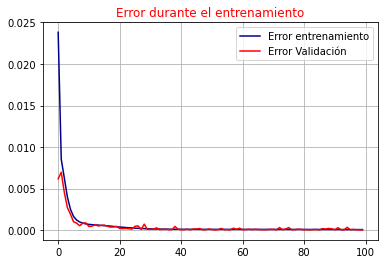

In [59]:
#Dos paredes ocultas


nodos=100
split_size=0.8
learning_rate=0.001
epocas=100

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X0,Y0,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(2,),use_bias=1,activation='sigmoid')
capa2=layers.Dense(nodos,use_bias=1,activation='sigmoid')

#para la capa de salida usamos Id como activación
salida=layers.Dense(3,use_bias=1)

#armamos el modelo
model.add(capa1)
model.add(capa2)
model.add(salida)
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),batch_size=4,epochs=epocas,shuffle=True)

error=history.history['loss']
exac=history.history['val_loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

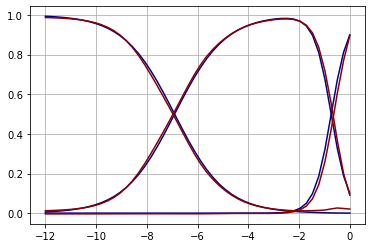

In [65]:
Z=np.linspace(0,-12,50)
dom=[]
dom2=[]
dom3=[]
for z in Z: dom.append([z,0.1]) 
A=model.predict(dom)

for z in Z: dom2.append([z,0.3]) 
B=model.predict(dom2)

for z in Z: dom3.append([z,0.9]) 
C=model.predict(dom3)

plt.plot(Z,EDO(Z, 0.1),color='darkblue')
plt.plot(Z,A,color='darkred')
#plt.plot(Z,B,color='darkblue')
#plt.plot(Z,C,color='darkgreen')
plt.grid()